In [ ]:
import torch
torch.manual_seed(0)
torch.cuda.manual_seed(0)

In [ ]:
from google.colab import drive

drive.mount('/content/drive')

Mounted at /content/drive


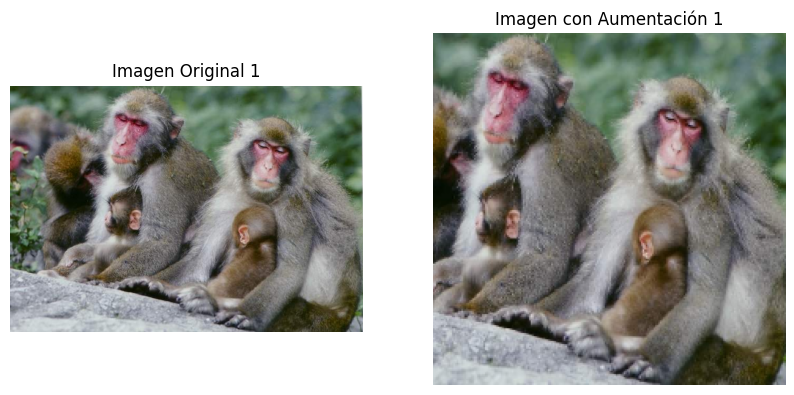

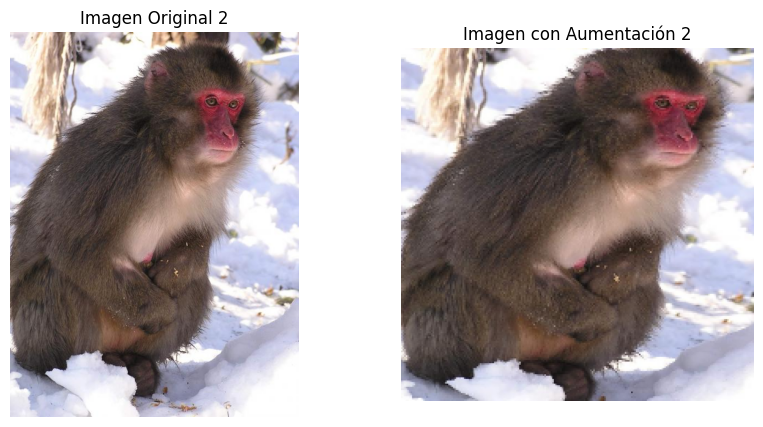

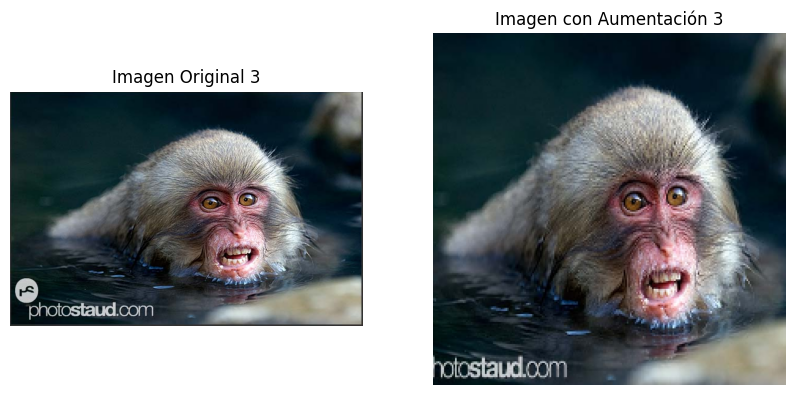

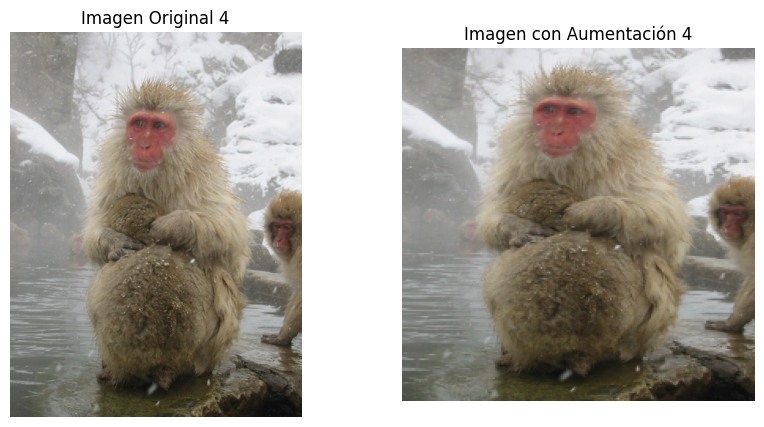

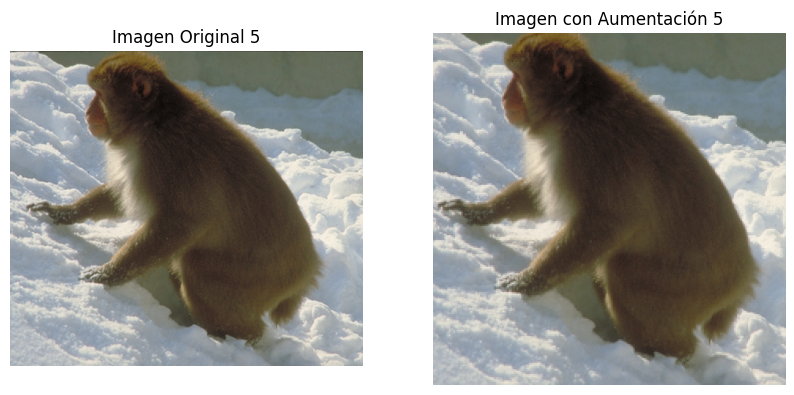

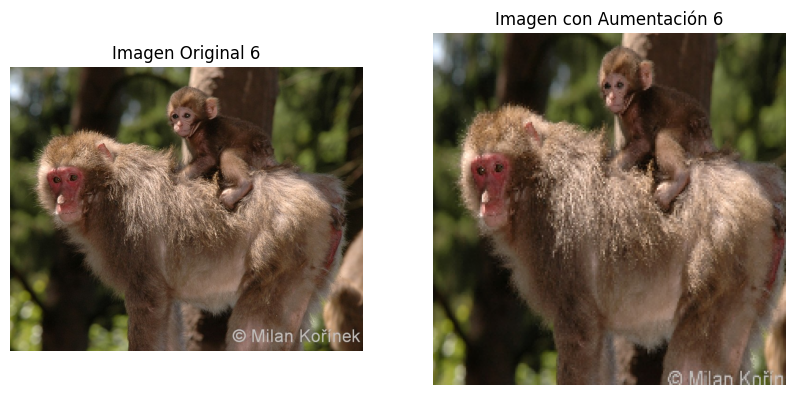

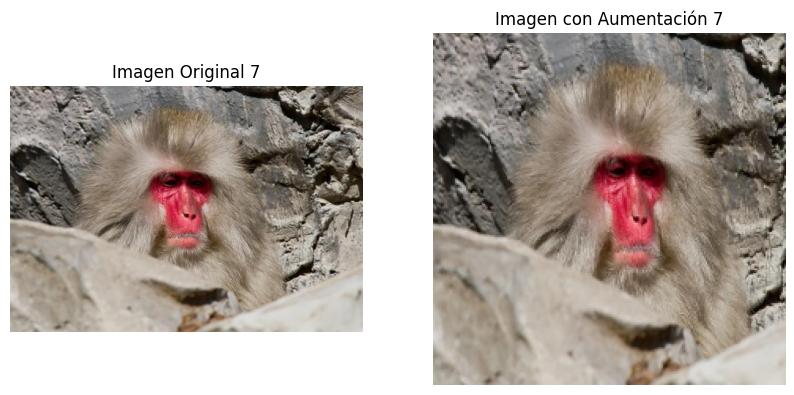

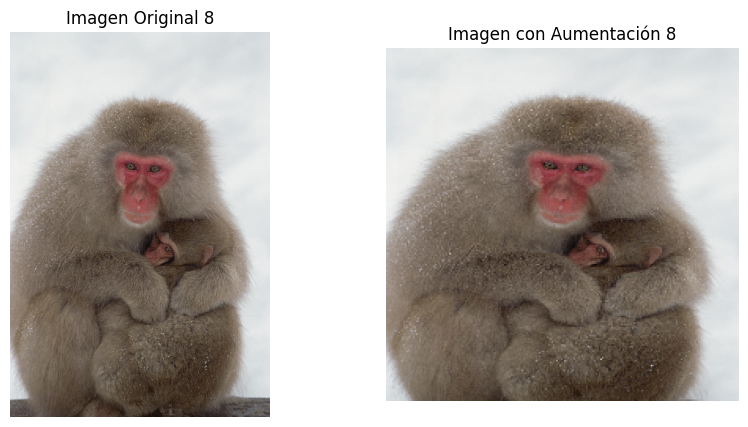

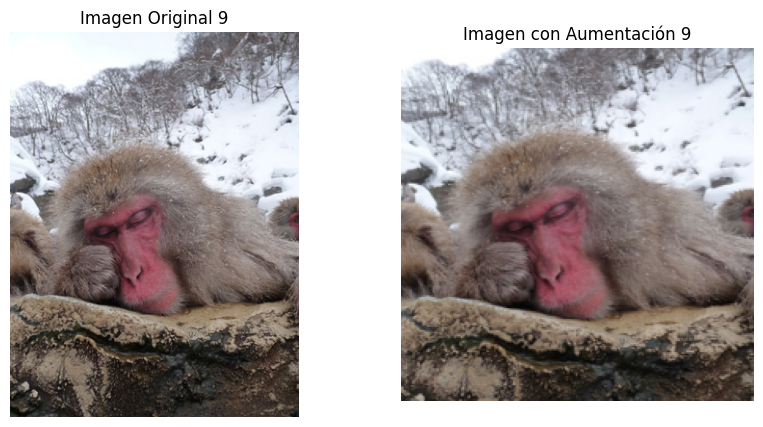

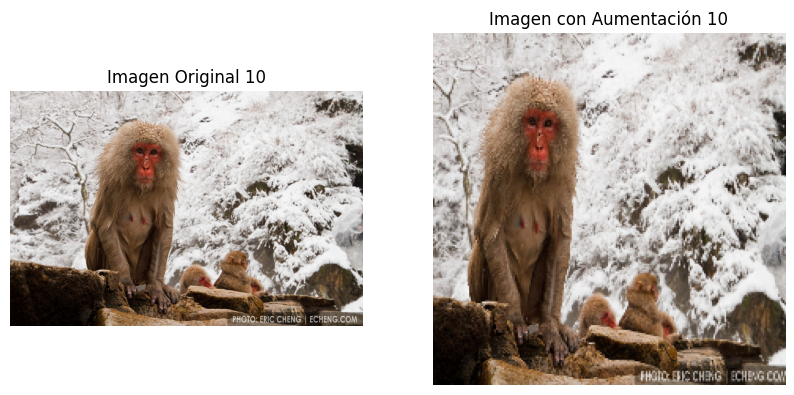

In [ ]:
import os
import matplotlib.pyplot as plt
from PIL import Image
import albumentations as A
from albumentations.pytorch import ToTensorV2
import cv2
import numpy as np

# Ruta a la carpeta de imágenes
img_folder = "drive/MyDrive/monkey/training/n3"
# Obtener la lista de imágenes y seleccionar las primeras 5
img_files = [f for f in os.listdir(img_folder) if f.endswith(('.png', '.jpg', '.jpeg'))]
img_files = img_files[:10]  # Seleccionar las primeras 5 imágenes

# Definir transformaciones de data augmentation con albumentations
data_augmentations = A.Compose([
    A.HorizontalFlip(p=0.5),
    A.Rotate(limit=30, p=0.5),
    A.ColorJitter(brightness=0.5, contrast=0.5, saturation=0.5, hue=0.2, p=0.5),
    A.RandomResizedCrop(height=224, width=224, scale=(0.8, 1.0), p=1.0),
    ToTensorV2()
])

# Función para mostrar imágenes
def show_images(original, augmented, img_idx):
    fig, axes = plt.subplots(1, 2, figsize=(10, 5))
    axes[0].imshow(original)
    axes[0].set_title(f"Imagen Original {img_idx+1}")
    axes[0].axis("off")

    axes[1].imshow(augmented)
    axes[1].set_title(f"Imagen con Aumentación {img_idx+1}")
    axes[1].axis("off")

    plt.show()

# Cargar y mostrar cada imagen
for i, img_file in enumerate(img_files):
    img_path = os.path.join(img_folder, img_file)

    # Cargar la imagen original
    img_original = Image.open(img_path).convert("RGB")  # Convertir a RGB en caso de que sea en escala de grises
    img_original_np = np.array(img_original)  # Convertir la imagen a formato NumPy para albumentations

    # Aplicar las transformaciones a la imagen
    augmented = data_augmentations(image=img_original_np)
    img_augmented_np = augmented["image"].permute(1, 2, 0).cpu().numpy()  # Cambiar dimensiones para visualización

    # Mostrar la imagen original y la aumentada
    show_images(img_original_np, img_augmented_np, i)